## Preparing Power Generation data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

import time

%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('Dataset_Molenstraat_64.csv',parse_dates=['date'])
df.head()

,date,timestamp,temp_celsius,clouds_all,weather_id,rain_1h,sunrise,sunset,SolarGen
0,2023-09-07,2023-09-07 13:00:00,29.51,11,801,0.0,06:56:39,20:13:17,5.100
1,2023-09-07,2023-09-07 14:00:00,29.90,8,800,0.0,06:56:39,20:13:17,5.025
2,2023-09-07,2023-09-07 15:00:00,30.09,5,800,0.0,06:56:39,20:13:17,4.675
3,2023-09-07,2023-09-07 16:00:00,29.29,4,800,0.0,06:56:39,20:13:17,4.000
4,2023-09-07,2023-09-07 17:00:00,28.24,3,800,0.0,06:56:39,20:13:17,2.950


In [4]:
df.tail(5)

,date,timestamp,temp_celsius,clouds_all,weather_id,rain_1h,sunrise,sunset,SolarGen
660,2023-10-04,2023-10-04 20:00:00,13.25,18,801,0.0,07:40:44,19:10:34,0.0
661,2023-10-04,2023-10-04 21:00:00,13.61,45,802,0.0,07:40:44,19:10:34,0.0
662,2023-10-04,2023-10-04 22:00:00,13.92,58,803,0.0,07:40:44,19:10:34,0.0
663,2023-10-04,2023-10-04 23:00:00,13.81,66,803,0.0,07:40:44,19:10:34,0.0
664,2023-10-05,2023-10-05 00:00:00,13.68,73,803,0.0,07:42:25,19:08:17,0.0


In [5]:
print(df.SolarGen)

0      5.100
1      5.025
2      4.675
3      4.000
4      2.950
       ...  
660    0.000
661    0.000
662    0.000
663    0.000
664    0.000
Name: SolarGen, Length: 665, dtype: float64


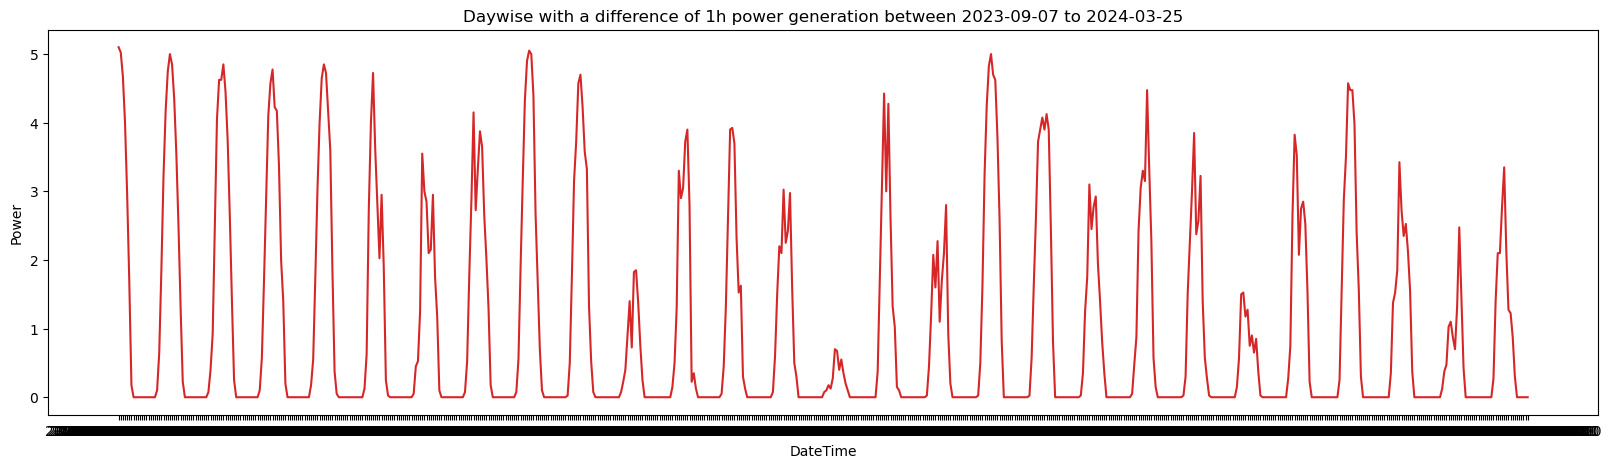

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Draw Plot
def plot_df(df, x, y, title="", xlabel='DateTime', ylabel='Power', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.timestamp, y=df.SolarGen, title='Daywise with a difference of 1h power generation between 2023-09-07 to 2024-03-25')    


Clearly, Solar energy is only produced between the sunrise and sunset

In [7]:

# Ensure 'date' column is of datetime type
df['date'] = pd.to_datetime(df['date'])

# Convert 'sunrise' and 'sunset' to datetime using the date from the 'date' column
df['sunrise'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['sunrise'])
df['sunset'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['sunset'])

# Adjust the date for rows where the sunset occurs after midnight
df.loc[df['sunset'] < df['sunrise'], 'sunset'] += pd.Timedelta(days=1)

# Filter the rows where the timestamp is between sunrise and sunset
mask = (df['timestamp'] >= df['sunrise']) & (df['timestamp'] <= df['sunset'])
filtered_df = df[mask]

print(filtered_df)

          date            timestamp  temp_celsius  clouds_all  weather_id  \
0   2023-09-07  2023-09-07 13:00:00         29.51          11         801   
1   2023-09-07  2023-09-07 14:00:00         29.90           8         800   
2   2023-09-07  2023-09-07 15:00:00         30.09           5         800   
3   2023-09-07  2023-09-07 16:00:00         29.29           4         800   
4   2023-09-07  2023-09-07 17:00:00         28.24           3         800   
..         ...                  ...           ...         ...         ...   
655 2023-10-04  2023-10-04 15:00:00         16.57         100         804   
656 2023-10-04  2023-10-04 16:00:00         16.31         100         804   
657 2023-10-04  2023-10-04 17:00:00         15.47         100         804   
658 2023-10-04  2023-10-04 18:00:00         14.25          86         804   
659 2023-10-04  2023-10-04 19:00:00         13.37          16         801   

     rain_1h             sunrise              sunset  SolarGen  
0        0

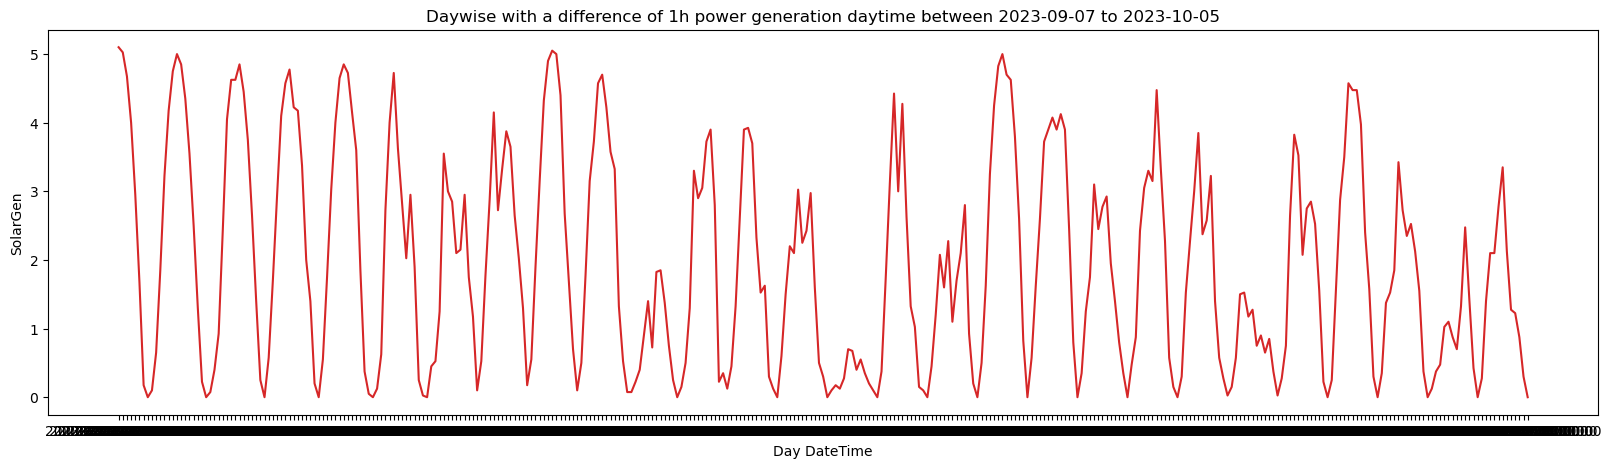

In [8]:
# Draw Plot
def plot_filtered_df(filtered_df, x, y, title="", xlabel='Day DateTime', ylabel='SolarGen', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_filtered_df(filtered_df, x=filtered_df.timestamp, y=filtered_df.SolarGen, title='Daywise with a difference of 1h power generation daytime between 2023-09-07 to 2023-10-05') 

In [9]:
print(filtered_df.isna().sum())

date            0
timestamp       0
temp_celsius    0
clouds_all      0
weather_id      0
rain_1h         0
sunrise         0
sunset          0
SolarGen        0
dtype: int64


In [10]:
filtered_df.describe()

,date,temp_celsius,clouds_all,weather_id,rain_1h,sunrise,sunset,SolarGen
count,344,344.000000,344.000000,344.000000,344.000000,344,344,344.000000
mean,2023-09-20 13:02:47.441860352,20.140145,70.793605,778.281977,0.046744,2023-09-20 20:21:27.133720832,2023-09-21 08:44:34.741279232,1.961265
min,2023-09-07 00:00:00,12.020000,0.000000,500.000000,0.000000,2023-09-07 06:56:39,2023-09-07 20:13:17,0.000000
25%,2023-09-13 00:00:00,17.027500,52.750000,802.000000,0.000000,2023-09-13 07:06:22,2023-09-13 19:59:23,0.493750
50%,2023-09-21 00:00:00,19.555000,86.000000,803.000000,0.000000,2023-09-21 07:19:21,2023-09-21 19:40:42,1.712500
75%,2023-09-28 00:00:00,22.477500,100.000000,804.000000,0.000000,2023-09-28 07:30:48,2023-09-28 19:24:23,3.150000
max,2023-10-04 00:00:00,31.400000,100.000000,804.000000,1.940000,2023-10-04 07:40:44,2023-10-04 19:10:34,5.100000
std,NaN,4.231672,33.595274,82.914365,0.202742,NaN,NaN,1.540333


## Exploratory data analysis

In [11]:
filtered_df.dtypes

date            datetime64[ns]
timestamp               object
temp_celsius           float64
clouds_all               int64
weather_id               int64
rain_1h                float64
sunrise         datetime64[ns]
sunset          datetime64[ns]
SolarGen               float64
dtype: object

### EDA for numerical features

/var/folders/1n/bzy8yw5s1qzbj31lsn22dysw0000gn/T/ipykernel_27035/2632458076.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[col], bins = bins, rug=True, hist = hist)


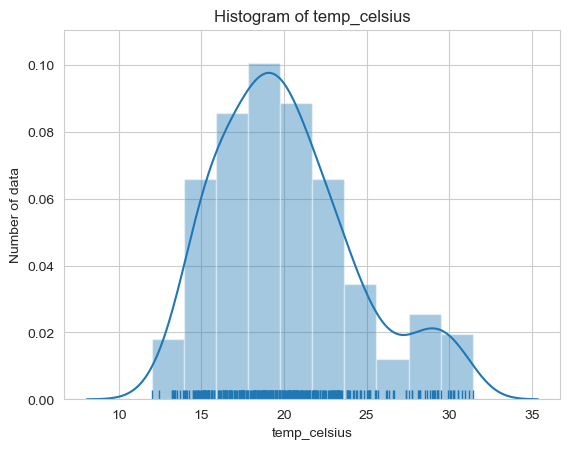

/var/folders/1n/bzy8yw5s1qzbj31lsn22dysw0000gn/T/ipykernel_27035/2632458076.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[col], bins = bins, rug=True, hist = hist)


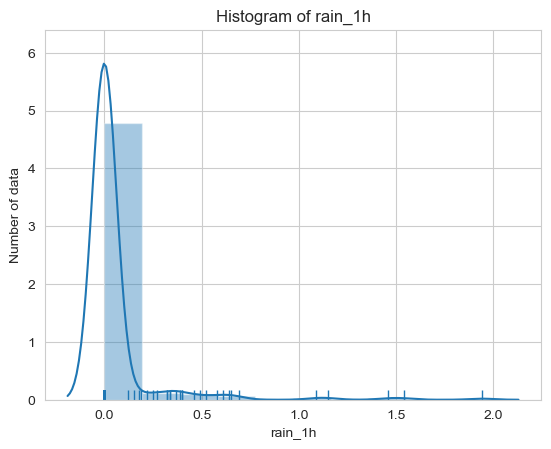

/var/folders/1n/bzy8yw5s1qzbj31lsn22dysw0000gn/T/ipykernel_27035/2632458076.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[col], bins = bins, rug=True, hist = hist)


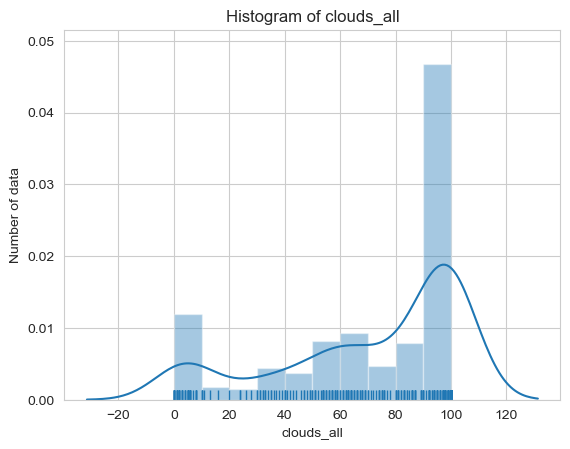

In [12]:
def plot_density_hist(filtered_df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(filtered_df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of data')# Set text for y axis
        plt.show()
 
num_cols = ['temp_celsius', 'rain_1h','clouds_all']  # Replace with actual numeric column names

plot_density_hist(filtered_df, num_cols, hist=True)        

'rain_1h' is highly right skewed; 'clouds_all' is left skewed

/var/folders/1n/bzy8yw5s1qzbj31lsn22dysw0000gn/T/ipykernel_27035/3478294587.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)


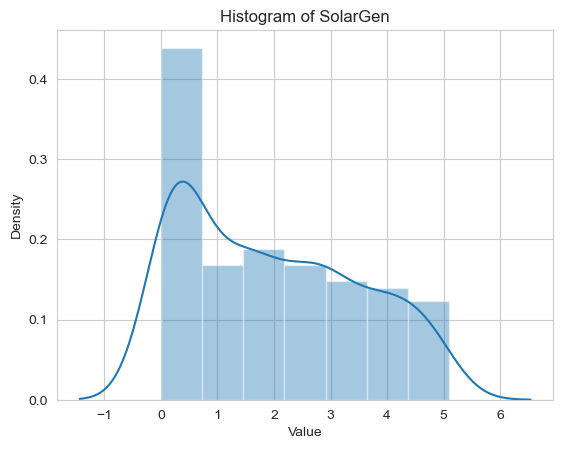

In [13]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(filtered_df['SolarGen'], 'SolarGen')

here we see solar generation is right skewed as well

### EDA for categorical features

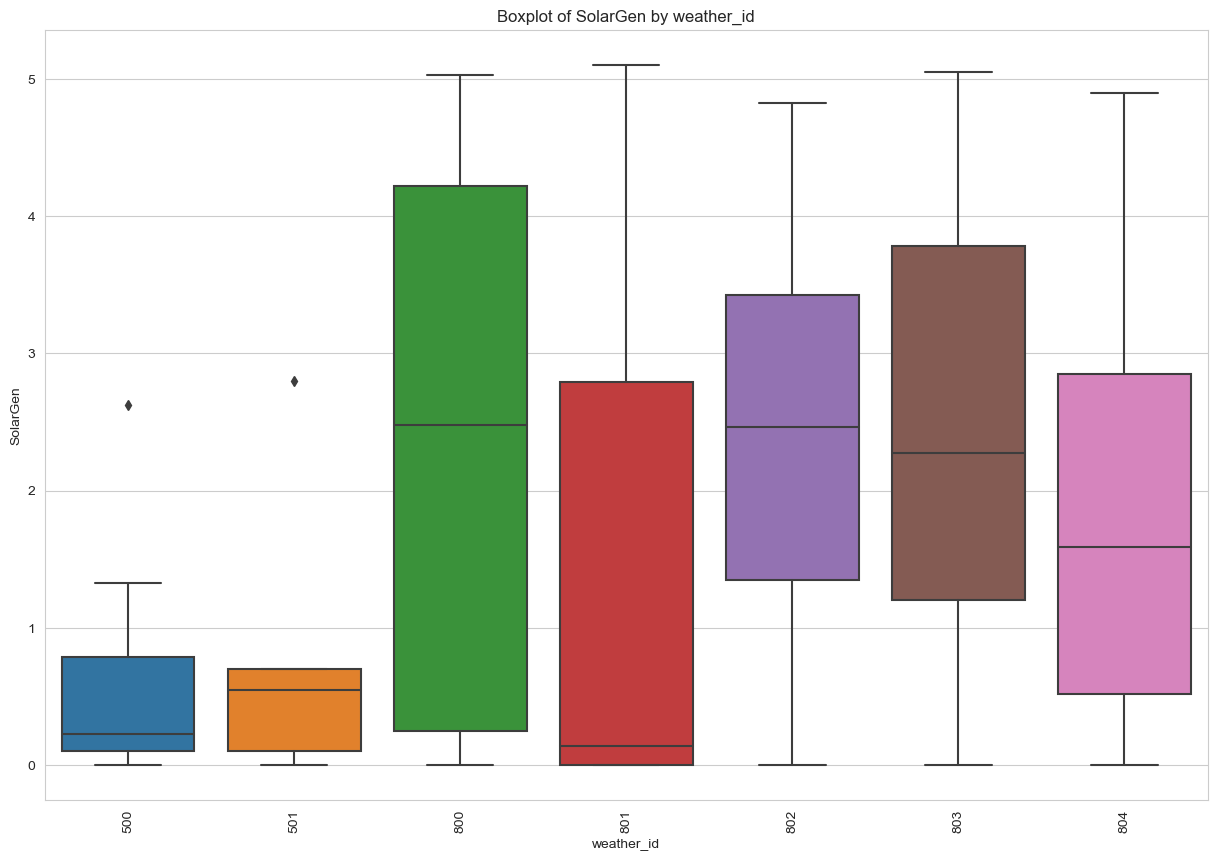

In [14]:
def plot_box(filtered_df, cols, col_y):
    for col in cols:
        plt.figure(figsize=(15, 10))
        sns.set_style("whitegrid")
        
        # Ensure to pass column names as keyword arguments
        ax = sns.boxplot(x=col, y=col_y, data=filtered_df, orient='v')
        
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.xlabel(col)  # Set text for the x axis
        plt.ylabel(col_y)  # Set text for the y axis
        plt.title(f'Boxplot of {col_y} by {col}')  # Set the plot title
        plt.show()


cat_cols = [ 'weather_id']  
numeric_col = 'SolarGen' 
plot_box(filtered_df, cat_cols, numeric_col)

'weather_id' is important as different codes seem to play different job on solar power generation

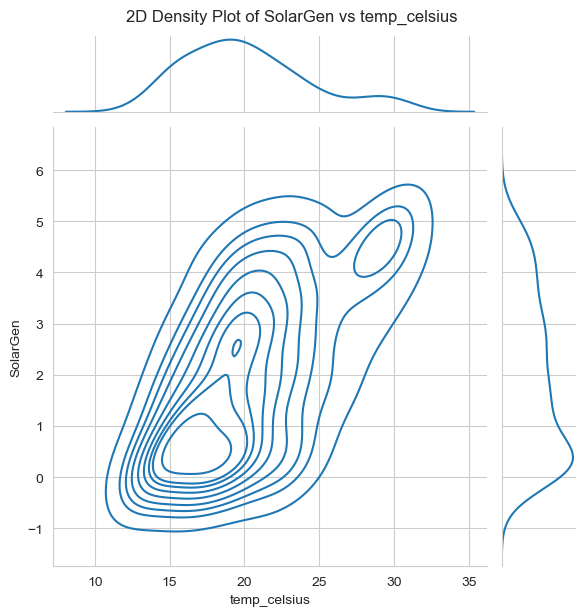

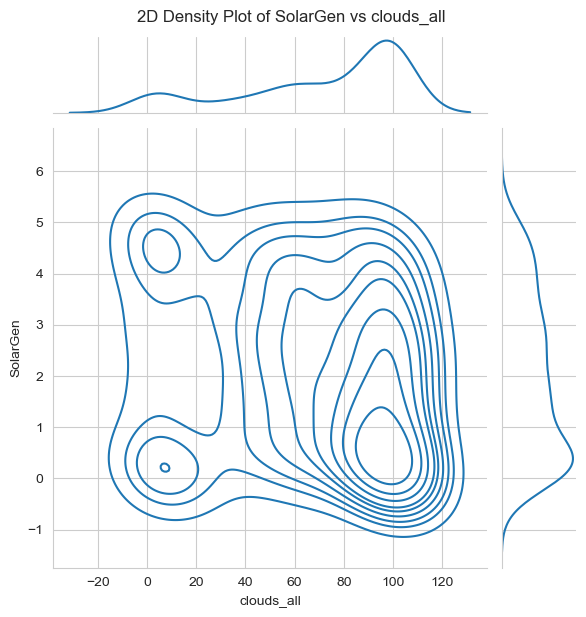

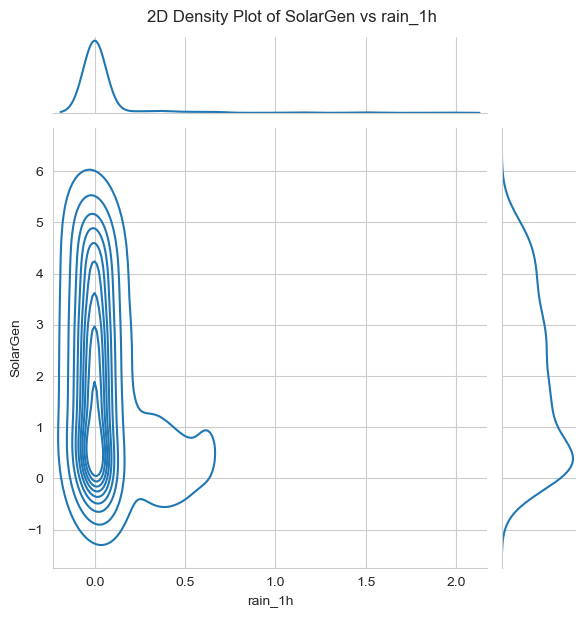

In [15]:
def plot_density_2d(filtered_df, cols, col_y, kind='scatter'):
    for col in cols:
        sns.set_style("whitegrid")
        
     
        sns.jointplot(x=col, y=col_y, data=filtered_df, kind=kind)
        
        plt.xlabel(col)  # Set text for the x axis
        plt.ylabel(col_y)  # Set text for the y axis
        plt.suptitle(f'2D Density Plot of {col_y} vs {col}', y=1.02)  # Set the plot title
        plt.show()


num_cols = ['temp_celsius', 'clouds_all', 'rain_1h', ]  
numeric_col = 'SolarGen'  
plot_density_2d(filtered_df, num_cols, numeric_col, kind='kde') 

In [16]:
### Correlation coefficients of all features

The correlation matrix shows some multicollinearity between variables, as well as many weak correlations.

SyntaxError: invalid syntax (607950847.py, line 3)

In [ ]:
correlation_matrix = filtered_df[['temp_celsius', 'clouds_all', 'weather_id', 'rain_1h','SolarGen']].corr()

# Plot the heatmap
plt.figure(figsize=(21, 13))
sns.heatmap(correlation_matrix, cmap='Greens', annot=True)
plt.title('Feature Correlation')
plt.show()

'temp_celsius' contributes more to power.

## Applying Linear Regression


In [17]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [18]:
print(filtered_df['weather_id'].value_counts())


weather_id
804    152
803     82
800     44
802     32
500     23
801      6
501      5
Name: count, dtype: int64


In [19]:
## normalization

print(filtered_df['weather_id'].unique())
Features = filtered_df['weather_id']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

[801 800 803 804 802 501 500]
[3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 5 5 5 5 5 6 6 5 5 4 4 4 4 6 6 6 6 6 6 6 1 4 5 4 5 5 3 4 4 5 5 5 0
 0 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 5 5 4 5 5 5 5 5 5 5 6 6 6 6 5 5 6 6 6 5 6
 4 4 4 4 4 5 6 6 6 6 6 0 6 6 6 6 6 5 5 5 6 6 6 6 6 6 5 5 5 6 5 5 1 0 5 6 6
 6 6 6 6 6 6 6 6 6 6 0 6 6 6 6 6 6 6 6 6 6 5 6 0 0 0 0 0 0 0 1 0 0 1 0 5 5
 5 5 4 4 0 0 0 0 0 6 4 4 4 5 5 0 6 5 5 5 5 2 5 5 5 4 4 5 5 5 5 5 4 2 6 6 6
 6 6 6 6 5 4 4 4 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 5
 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 5 5 5 6 6 6 6 6 5 2 5 5 5 5 5 6 6 6 6 6 6 6
 2 4 4 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 4 6 6 6 6 0 0 1 5 4 4 4 3 3
 4 5 5 5 6 6 6 6 6 6 3]


In [20]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
print(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

[[3]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [4]
 [4]
 [4]
 [4]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [1]
 [4]
 [5]
 [4]
 [5]
 [5]
 [3]
 [4]
 [4]
 [5]
 [5]
 [5]
 [0]
 [0]
 [6]
 [6]
 [6]
 [6]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [6]
 [4]
 [4]
 [4]
 [4]
 [4]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [0]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [1]
 [0]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [0]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [6]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [5]
 [5]
 [5]
 [5]
 [4]
 [4]
 [0]
 [0]
 [0]
 [0]
 [0]
 [6]
 [4]
 [4]
 [4]
 [5]
 [5]


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [21]:
Features = np.concatenate([Features, np.array(filtered_df[["temp_celsius", "clouds_all", "rain_1h"]])], axis = 1)
Features[:2,:]
print(Features.shape)

(344, 10)


## Split the dataset

In [22]:
## Randomly sample cases to create independent training and test data
nr.seed(9922)
labels = np.array(filtered_df['SolarGen'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.25)
# print(indx)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

## Rescale Numeric features


In [23]:
scaler = preprocessing.StandardScaler().fit(x_train[:,5:])
x_train[:,5:] = scaler.transform(x_train[:,5:])
x_test[:,5:] = scaler.transform(x_test[:,5:])
print(x_train.shape)
x_train[:5,:]

# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
# print(x_train.shape)
# x_train[:5,:]

(258, 10)


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.56242913, -0.93250481, -0.34862685, -0.85277954, -0.21990388],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.56242913,  1.07238053,  0.60433743,  0.85065732, -0.21990388],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.77800178, -0.93250481, -0.16873054, -0.24440923, -0.21990388],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.56242913,  1.07238053,  1.19021598,  0.85065732, -0.21990388],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.56242913,  1.07238053, -0.93450541,  0.60730919, -0.21990388]])

In [24]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

## Intially empty your model folder

In [25]:
import os
for x in os.listdir('./models'):
    os.remove('./models/'+x)

In [26]:
!pip install joblib
import joblib
  
filename = str(int(time.time())) + '_model_' + 'linear_mod.pkl'  
# Save the model as a pickle in a file 
joblib.dump(lin_mod, './models/'+filename) 

['./models/1716318725_model_linear_mod.pkl']

In [27]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 7.25735579  8.25409718  5.78246654  6.39373966  7.18751895  3.30848284
  3.74019701  0.97839364 -0.37547481 -0.2011634 ]


In [28]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
y_score = lin_mod.predict(x_test) 
y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics(y_test, y_score, 28)   

Mean Square Error      = 1.5352120160441103
Root Mean Square Error = 1.2390367290940614
Mean Absolute Error    = 1.0028579601352356
Median Absolute Error  = 0.8716284404450829
R^2                    = 0.3854370709358125
Adjusted R^2           = 0.09934743154386311


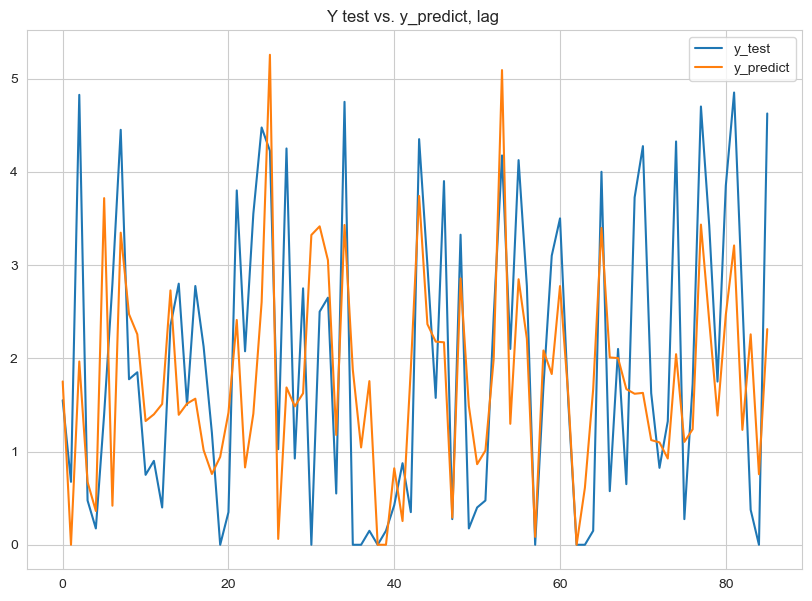

In [29]:
def plot_res(y_test, y_score, label_test, label_score, dpi=100):
    plt.figure(figsize=(10,7), dpi=dpi)
    plt.plot(y_test, label=label_test)
    plt.plot(y_score, label=label_score)
    plt.legend(loc=1)
    plt.title('Y test vs. y_predict, lag ' )
    plt.show()
    
plot_res(y_test, y_score, label_test = 'y_test', label_score='y_predict')

In [30]:
model_results = []

In [31]:
# Save all the results
    
model_results_dict = {}
    
model_results_dict['Algo'] = 'Linear Regression'
model_results_dict['lag'] = 'NA'
model_results_dict['dropout'] = 'NA'
model_results_dict['epochs'] = 'NA'
model_results_dict['batch_size'] = 'NA'
model_results_dict['loss'] = 'NA'
model_results_dict['rmse'] = rmse
model_results_dict['power_gen_rmse'] = math.sqrt(rmse)
model_results_dict['r2'] = r2
model_results_dict['model_filename'] = filename
model_results_dict['time_ran'] = int(time.time())
model_results.append(model_results_dict)

In [32]:
new_res_df = pd.DataFrame(model_results)
new_res_df.to_csv('result.csv')

## Applying LSTM

In [33]:
x_train.shape

(258, 10)

The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

1. Samples. One sequence is one sample. A batch is comprised of one or more samples.
2. Time Steps. One time step is one point of observation in the sample.
3. Features. One feature is one observation at a time step.

In [34]:
X_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
X_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
X_train.shape

(258, 1, 10)

Epoch 1/200


/Users/gongweiying/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.6552 - val_loss: 6.2535
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7312 - val_loss: 6.0559
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2063 - val_loss: 5.8586
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7898 - val_loss: 5.6506
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5797 - val_loss: 5.4389
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1029 - val_loss: 5.2200
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6790 - val_loss: 4.9859
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9555 - val_loss: 4.7327
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2600 - val_loss: 4.4552
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8673 - val_loss: 4.1846
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5865 - val_loss: 3.9057
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9090 - val_loss: 3.6105
Epoch 13/200

Root Mean Squared Error: 1.1770566068830277
Mean Absolute Error: 0.9072098814124284
Median Absolute Error: 0.6253191709518433
R-squared: 0.44538361272691196


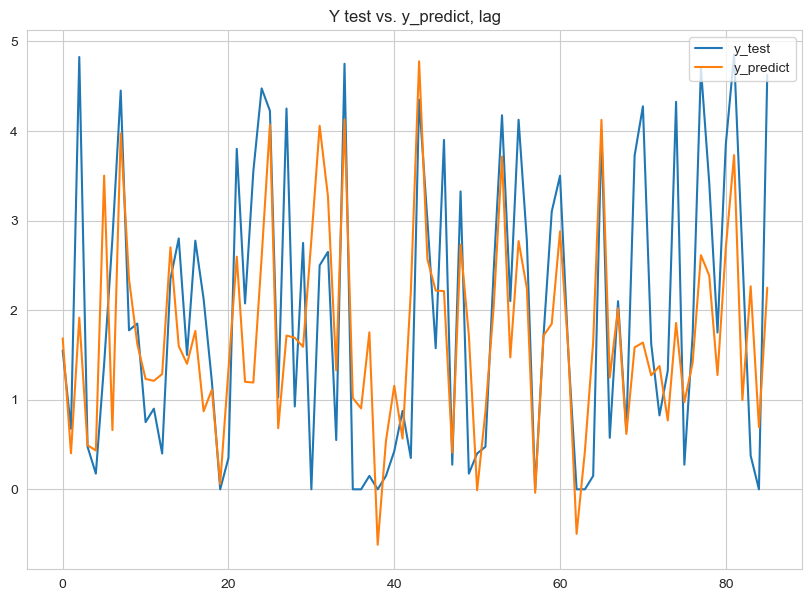

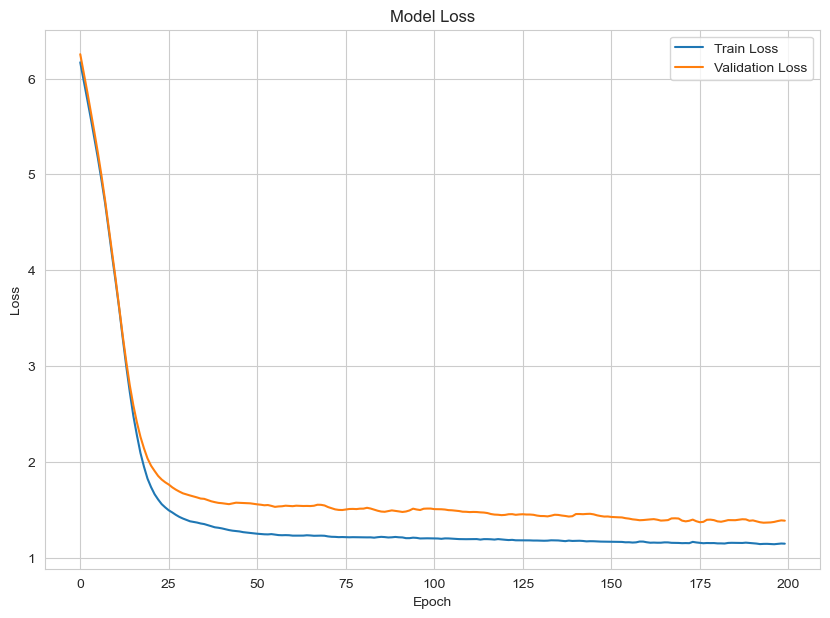

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
samples = X_train.shape[1]
dropout_ = 0.2
epochs_ = 200
batch_size_ = 32

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate metrics

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('Median Absolute Error:', medae)
print('R-squared:', r2)

# Save the model
filename = 'solar_prediction_model.h5'
model.save(filename)


# Define the plotting function for actual vs predicted values
def plot_res(y_test, y_score, label_test, label_score, dpi=100, save_path=None):
    plt.figure(figsize=(10, 7), dpi=dpi)
    plt.plot(y_test, label=label_test)
    plt.plot(y_score, label=label_score)
    plt.legend(loc=1)
    plt.title('Y test vs. y_predict, lag')
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Plot and save the results using the custom function
plot_res(y_test, y_pred, label_test='y_test', label_score='y_predict', save_path='y_test_vs_y_pred.png')

# Plot the training and validation loss
plt.figure(figsize=(10, 7), dpi=100)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('model_loss.png')
plt.show()

# Save metrics and model information in a dictionary
model_results_dict = {}
model_results_dict['Algo'] = 'LSTM'
model_results_dict['lag'] = samples
model_results_dict['dropout'] = dropout_
model_results_dict['epochs'] = epochs_
model_results_dict['batch_size'] = batch_size_
model_results_dict['loss'] = history.history
model_results_dict['rmse'] = rmse
model_results_dict['power_gen_rmse'] = math.sqrt(rmse)
model_results_dict['r2'] = r2
model_results_dict['model_filename'] = filename
model_results_dict['time_ran'] = int(time.time())

# Append to results list and save to file
model_results = []
model_results.append(model_results_dict)



In [36]:
model_results


[{'Algo': 'LSTM',
  'lag': 1,
  'dropout': 0.2,
  'epochs': 200,
  'batch_size': 32,
  'loss': {'loss': [6.1689982414245605,
    5.970414161682129,
    5.777233123779297,
    5.579677104949951,
    5.37494421005249,
    5.164698600769043,
    4.938236713409424,
    4.702940940856934,
    4.429201126098633,
    4.1465277671813965,
    3.8788366317749023,
    3.597876787185669,
    3.289241075515747,
    2.995198965072632,
    2.72582745552063,
    2.4783244132995605,
    2.2774388790130615,
    2.0928659439086914,
    1.9485924243927002,
    1.8239659070968628,
    1.7357878684997559,
    1.6616764068603516,
    1.6065934896469116,
    1.5581529140472412,
    1.5241272449493408,
    1.493601679801941,
    1.4711159467697144,
    1.446343183517456,
    1.4247928857803345,
    1.407857060432434,
    1.3932390213012695,
    1.3791844844818115,
    1.3722678422927856,
    1.3657985925674438,
    1.3563436269760132,
    1.350163221359253,
    1.339400291442871,
    1.327880859375,
    1.3164

In [44]:
new_res_df = pd.DataFrame(model_results)
# old_res_df = pd.read_csv('./result/result.csv', index_col=0)
# res_df = pd.concat([old_res_df, new_res_df], axis=0, sort=False).reset_index(drop=True)
new_res_df.to_csv('result.csv')